## Movie Recommendation Predict

Recommender systems play a vital role in today's technology-driven world by helping individuals make informed choices about the content they engage with daily. This is particularly true for movie recommendations, where intelligent algorithms can assist viewers in discovering great titles from a vast selection. Have you ever wondered how streaming platforms like Netflix, Amazon Prime, Showmax, and Disney seem to know what to recommend to you? In this challenge we will walk you through our movie recommender.

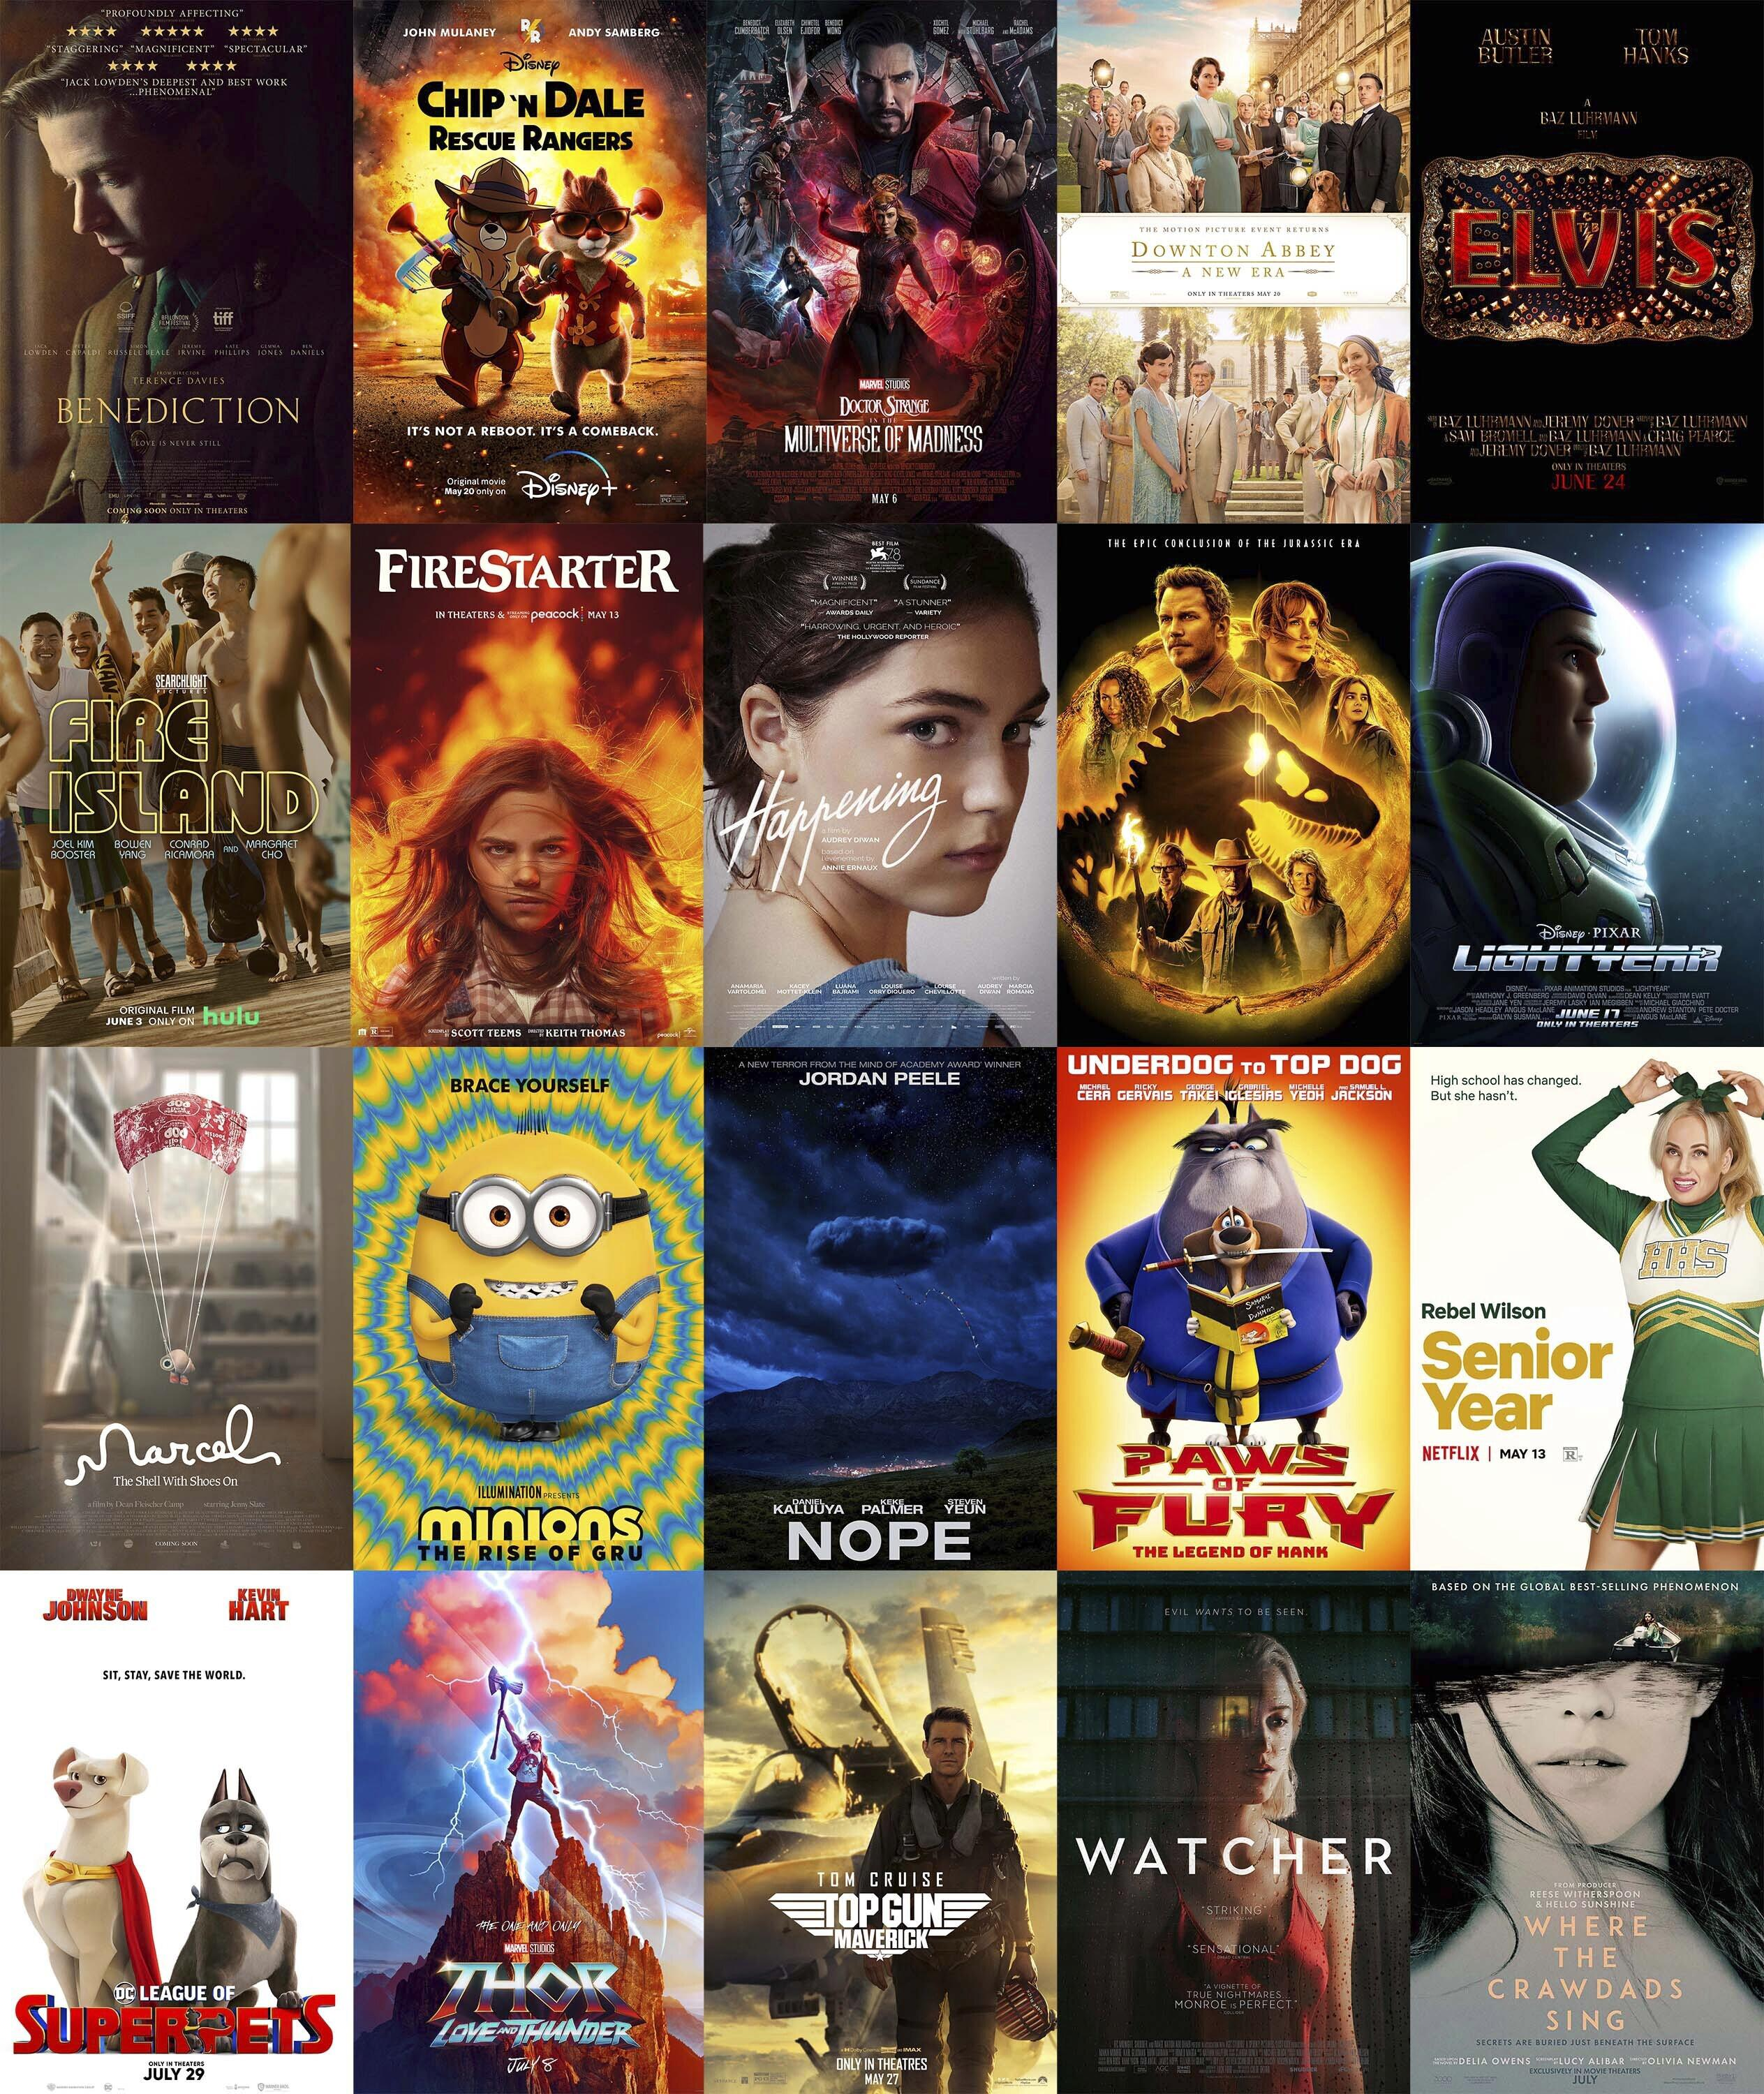

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading The Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>


   <a href=#six>6.1 Kaggle Submission CSV File</a>
   

<a href=#eight>7. Conclusion</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
#firstly to import important libraries
import pandas as pd
import numpy as np
#for plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
#for proceccing the data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
#to display codes without warning
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

There are a few dataframes that are to be imported, so simply importing the data for now and having the information within displayed a little down the line will help keep the notebook more aestheticaly pleasing.

In [2]:
genome_scores = pd.read_csv("genome_scores.csv")
genome_tags=pd.read_csv("genome_tags.csv")
imdb_data= pd.read_csv("imdb_data.csv")
links= pd.read_csv("links.csv")
movies= pd.read_csv("movies.csv")
tags= pd.read_csv("tags.csv")
df_test=pd.read_csv("test.csv")
df_train= pd.read_csv("train.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Having imported all of the data, it becomes clear that there is a lot of data to go through. This might prove dificult to provide an acurate analysis of the data. So to go through it with more ease, a basic EDA function was created to help show the basic information of each dataframe. this EDA function shows if the dataset has: missing values and also the position of the missing values, outliers and their position as well, check the data types, and lastly the correlation of the data.

In [3]:
def EDA(data):
    """Perform exploratory data analysis on a given dataset.
    Args:
      data (pandas.DataFrame): The dataset to analyze.
    """
    from IPython.display import display
    display(data.head())
    # Check for missing values
    if data.isnull().values.any():
        # Find the number of missing values for each column
        missing_counts = data.isnull().sum()
        # Select only the columns with missing values
        missing_columns = missing_counts[missing_counts > 0]
        print(f"Missing values found in columns: {missing_columns}")
    else:
        print("No missing values found")

    # Check for outliers
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    if outliers.empty:
        print("No outliers found")
    else:
        print(f"Outliers found at positions: {outliers.index}")

    # Check data types
    data_types = data.dtypes
    print(f"Data types: {data_types}")

    # Check correlations
    correlations = data.corr()
    display(correlations)

With EDA function above, now it is easier going through each dataframe and perfom simple data exploration. Below this step is completed swiftly

In [4]:
#fitting the EDA function to the test data as well as the train data
EDA(df_train)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


No missing values found
Outliers found at positions: RangeIndex(start=0, stop=10000038, step=1)
Data types: userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


,userId,movieId,rating,timestamp
userId,1.000000,-0.004270,0.002202,-0.001347
movieId,-0.004270,1.000000,-0.008940,0.520786
rating,0.002202,-0.008940,1.000000,0.010301
timestamp,-0.001347,0.520786,0.010301,1.000000


In [5]:
EDA(df_test)

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


No missing values found
Outliers found at positions: RangeIndex(start=0, stop=5000019, step=1)
Data types: userId     int64
movieId    int64
dtype: object


,userId,movieId
userId,1.000000,-0.004401
movieId,-0.004401,1.000000


In [6]:
#firstly the genome score
EDA(genome_scores)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


No missing values found
Outliers found at positions: RangeIndex(start=0, stop=15584448, step=1)
Data types: movieId        int64
tagId          int64
relevance    float64
dtype: object


,movieId,tagId,relevance
movieId,1.000000e+00,-1.390078e-13,0.015355
tagId,-1.390078e-13,1.000000e+00,0.017763
relevance,1.535521e-02,1.776320e-02,1.000000


In [7]:
#genome tags
EDA(genome_tags)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


No missing values found
Outliers found at positions: RangeIndex(start=0, stop=1128, step=1)
Data types: tagId     int64
tag      object
dtype: object


,tagId
tagId,1.0


In [8]:
#for the imdb data
EDA(imdb_data)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


Missing values found in columns: title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
Outliers found at positions: RangeIndex(start=0, stop=27278, step=1)
Data types: movieId            int64
title_cast        object
director          object
runtime          float64
budget            object
plot_keywords     object
dtype: object


,movieId,runtime
movieId,1.00000,-0.13273
runtime,-0.13273,1.00000


In [9]:
#the movies dataframe
EDA(movies)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


No missing values found
Outliers found at positions: RangeIndex(start=0, stop=62423, step=1)
Data types: movieId     int64
title      object
genres     object
dtype: object


,movieId
movieId,1.0


In [10]:
#now the tags
EDA(tags)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


Missing values found in columns: tag    16
dtype: int64
Outliers found at positions: RangeIndex(start=0, stop=1093360, step=1)
Data types: userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object


,userId,movieId,timestamp
userId,1.000000,-0.101326,-0.197582
movieId,-0.101326,1.000000,0.400216
timestamp,-0.197582,0.400216,1.000000


In [11]:
EDA(links)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Missing values found in columns: tmdbId    107
dtype: int64
Outliers found at positions: RangeIndex(start=0, stop=62423, step=1)
Data types: movieId      int64
imdbId       int64
tmdbId     float64
dtype: object


,movieId,imdbId,tmdbId
movieId,1.000000,0.466805,0.581131
imdbId,0.466805,1.000000,0.820764
tmdbId,0.581131,0.820764,1.000000


From the above information, it becomes clear that the data contains a few columns missing values, with  missing values found in the 'imdb_data' in only four columns and as well on 'tags' and 'links' having missing value. As for the outliers, the data seems have quite a few outliers. This could be due to the diversity of the data, how the data was entered or a myriad of other reasons. It might prove more fruitful to display the data numerical data and see how much of the data is outlier prone. The data types seem to show that the prominent datatypes are intergers and objects with only 2 columns being float datatypes.

#### Checking the columns with null values
We will have to see how much of the columns from the data which were found to have nulls is missing and if these missing values can be fixed by filling them in anyway or if they have to be dropped later on in the data handling phase

In [12]:
#to check the percantage of missing data
director_nulls= imdb_data['director'].isnull().mean()
runtime_nulls= imdb_data['runtime'].isnull().mean()
tmdbId_nulls= links['tmdbId'].isnull().mean()
tag_nulls= tags['tag'].isnull().mean()
plot_keywords_nulls= imdb_data['plot_keywords'].isnull().mean()
budget_nulls= imdb_data['budget'].isnull().mean()
# print the percentage of missing data
print("Percentage of missing data in column 'director': {:.2f}%".format(director_nulls*100))
print("Percentage of missing data in column 'runtime': {:.2f}%".format(runtime_nulls*100))
print("Percentage of missing data in column 'budget': {:.2f}%".format(budget_nulls*100))
print("Percentage of missing data in column 'plot_keywords': {:.2f}%".format(plot_keywords_nulls*100))
print("Percentage of missing data in column 'tag': {:.2f}%".format(tag_nulls*100))
print("Percentage of missing data in column 'tmdbId': {:.2f}%".format(tmdbId_nulls*100))

Percentage of missing data in column 'director': 36.20%
Percentage of missing data in column 'runtime': 44.32%
Percentage of missing data in column 'budget': 71.02%
Percentage of missing data in column 'plot_keywords': 40.61%
Percentage of missing data in column 'tag': 0.00%
Percentage of missing data in column 'tmdbId': 0.17%


It would seem that a noticeable chunk of the columns with missing data actually has missing data, with an exception of the 'tag' and the 'tmdbId' column, as it seems the missing values are negligible. This can be seen visually below in the bar chart. This will be addressed in the data handling.

<Figure size 1080x720 with 0 Axes>

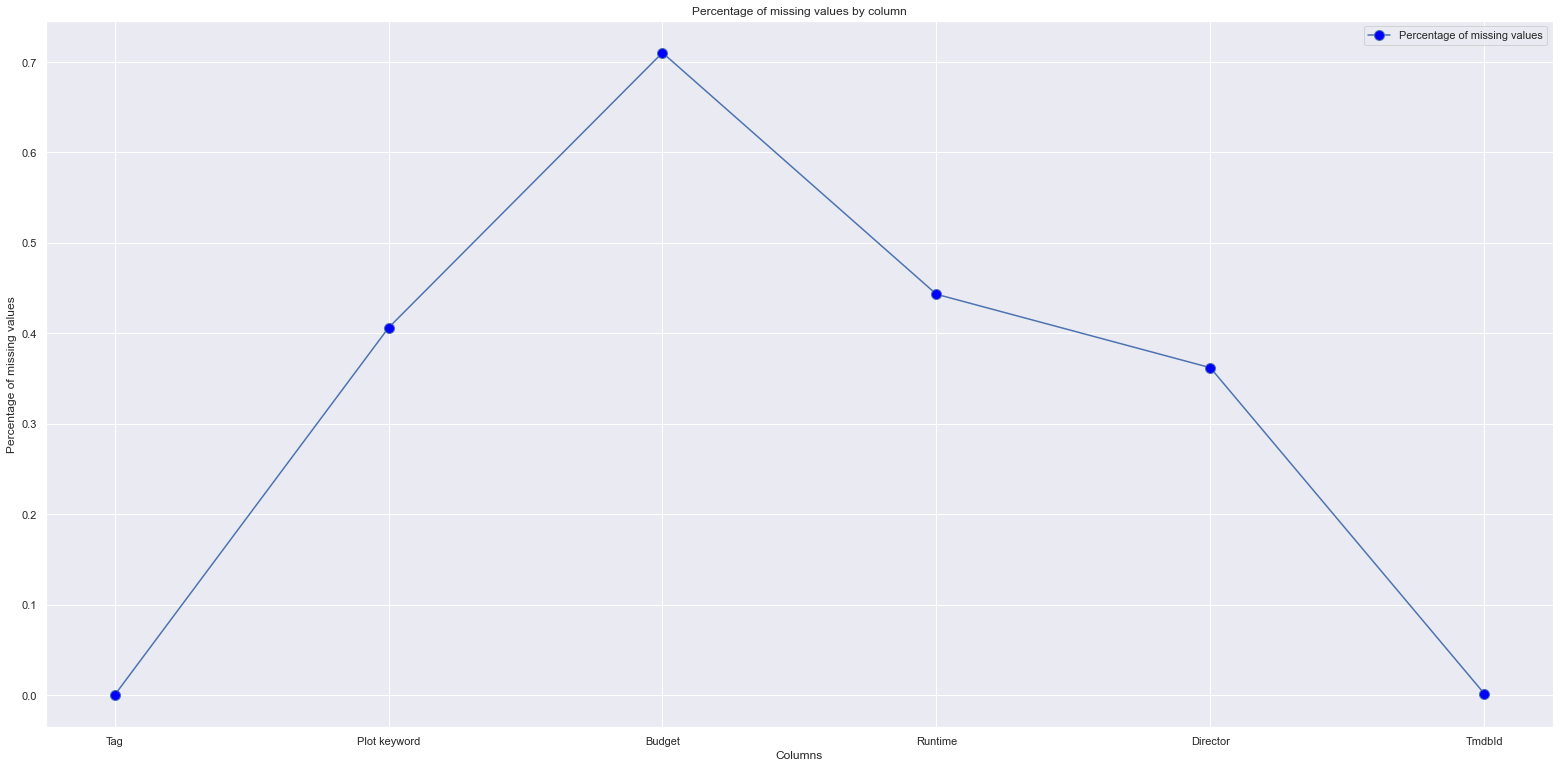

In [23]:
missing_data={'Tag': tag_nulls, 'Plot keyword': plot_keywords_nulls, 'Budget': budget_nulls,
              'Runtime': runtime_nulls, 'Director': director_nulls, 'TmdbId':tmdbId_nulls}
missing_data = pd.DataFrame(list(missing_data.items()),columns= ['Columns', 'Percentage of missing values'])
plt.figure(figsize=(15, 10))
missing_data.plot(kind='line',x='Columns',y='Percentage of missing values',  
                  marker='o', linestyle='-', markersize=10, markerfacecolor='blue')
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values by column')
plt.show()

For more visuals, one would perhaps want to see what relationships can be infered from the data sets or what relationships could be interesting to explore. This will require some creative thinking since some key columns such as budget and runtime are missing a significant amount of data. However below we can see the top 15 highest rated genres.

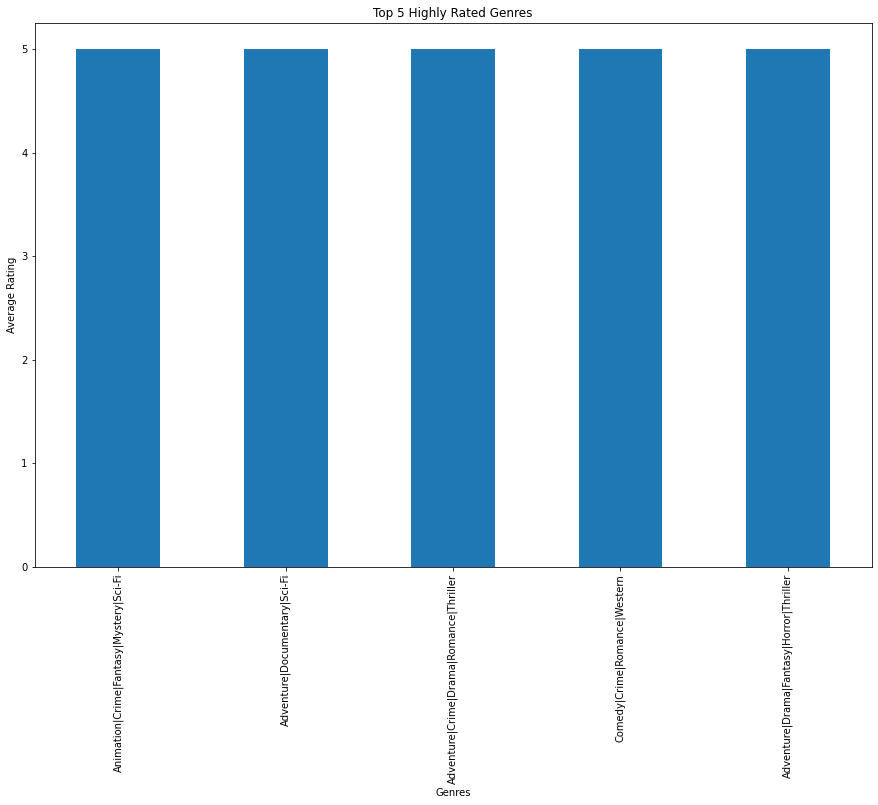

In [14]:
# merge data on movieId
merged_df = pd.merge(movies, df_train, on='movieId')
# group the data by genre and calculate the mean rating for each group
genre_ratings = merged_df.groupby('genres')['rating'].mean().sort_values(ascending=False)
# select the top 15 highly rated genres
top_genres = genre_ratings.head(5)
# create the bar chart
plt.figure(figsize=(15, 10))
top_genres.plot(kind='bar',xlabel='Genres', ylabel='Average Rating',title='Top 5 Highly Rated Genres')
plt.xticks(rotation=90)
plt.show()

This goes on to show that from some of the most popular genres crime and adventure are the two most highly rated genres. But overall genres such as comedy, drama, fantasy etc all have high ratings of 5.

another thing that can be shown is how the ratings are distributed throughout the dataset as shown below. this piechart shows the percentage of each rating, with the ratings labeled from 0.5 (the lowest) all the way to 5.0 (highest rating) all in intervals of 0.5

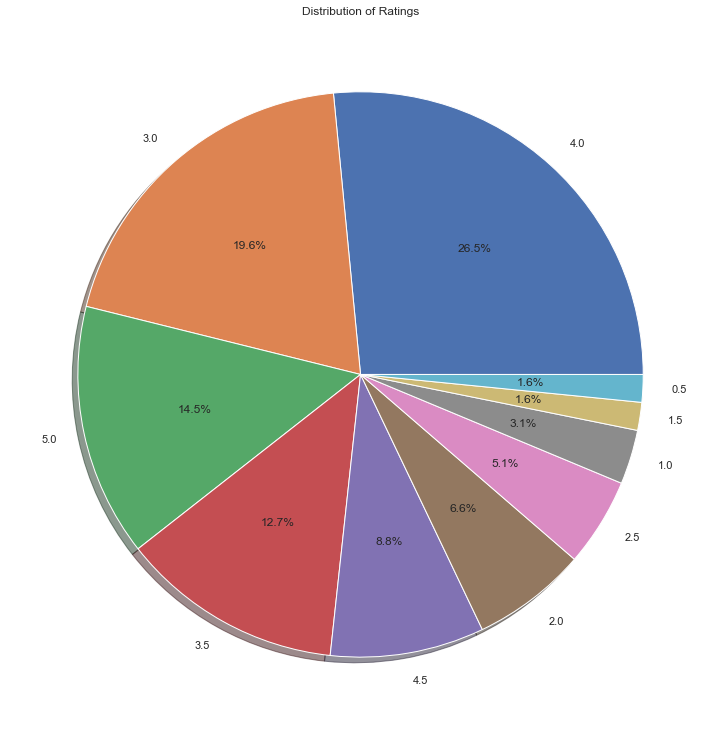

In [15]:
# Visualize the distribution of ratings
sns.set(rc={'figure.figsize':(27,13)})
rating_counts = df_train['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Ratings')
plt.show()

but the exploration of the data sets does not end there. When movies are being titled, there could be a method in which movie titles are chosen in way that could results in higher rating or better responses from the audiance. A word cloud can be used to show the most popular words in titles.

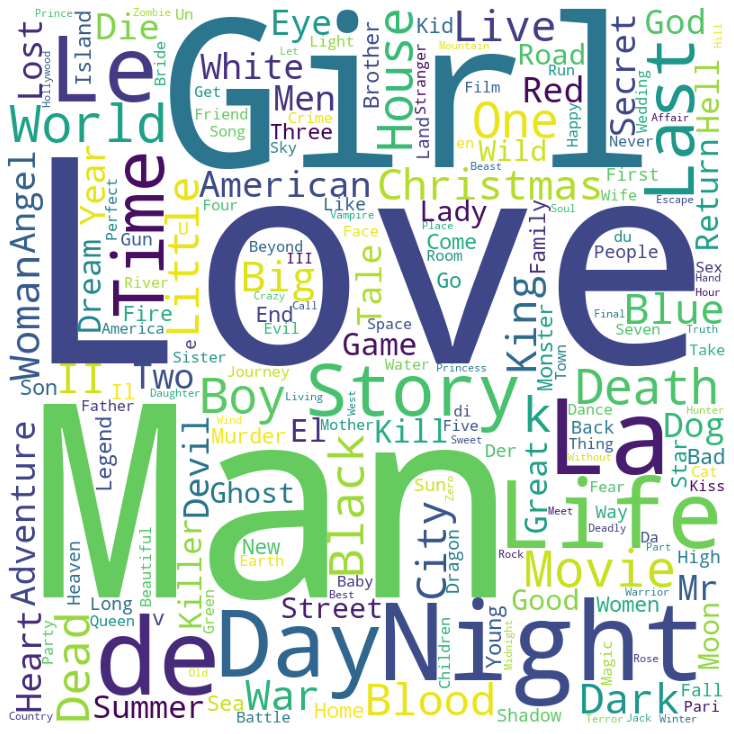

In [16]:
#create a set of english stopwords
stopwords = set(stopwords.words('english'))
#create a list of all the words in the 'title' column
words = ' '.join(movies['title'])
#create a wordcloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words)

# plot the wordcloud
plt.figure(figsize = (15, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

From the wordcloud it becomes apparent that words like Love, Man and Girl are largly popular when naming a movie. One could, at this point only speculate as to what role naming does to the popularity of a movie. Although it can be said that the name of the movie does play an important role in being as discriptive, eye catching and as relevant as possible so as to attract the intended target market.

With the exploration of the data done as extensively as possible. It is now time to move on to the Data Engineering phase.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

From the Exploratory Data Analysis, it was made clear that the columns from the imdb data are lacking a significant amount of information. In this phase of the project, it is important to drop those columns

In [17]:
columns_to_drop = ['director','runtime','budget','plot_keywords']
# drop the specified columns
imdb_data.drop(columns=columns_to_drop, inplace=True)
movies = movies.drop_duplicates()

But the biggest issue that must be avoided is having unnecessary data that to offset the recommender, so in keeping with the etiquette of unsupervised machine learning. A new dataset will be created, one that contains primarily numeric and categorical data.

In [18]:
#columns we would like added into the training data
imdb_title_cast = imdb_data[['movieId','title_cast']]
movies_genre = movies[['movieId','genres']]
links_ids = links[['movieId','imdbId','tmdbId']]
#merging them
df_train2 = pd.merge(df_train, imdb_title_cast, on='movieId', how='left')
df_train2 = pd.merge(df_train, movies_genre, on='movieId', how='left')
df_train2 = pd.merge(df_train, links_ids, on='movieId', how='left')
df_train2

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,5163,57669,4.0,1518349992,780536,8321.0
1,106343,5,4.5,1206238739,113041,11862.0
2,146790,5459,5.0,1076215539,120912,608.0
3,106362,32296,2.0,1423042565,385307,10040.0
4,9041,366,3.0,833375837,111686,11596.0
...,...,...,...,...,...,...
10000033,136395,99114,5.0,1521235092,1853728,68718.0
10000034,140078,553,3.0,1002580977,108358,11969.0
10000035,154807,56782,4.0,1227674807,469494,7345.0
10000036,85805,327,4.0,1479921530,114614,9067.0


In [19]:
#checking for null in the new df
df_train2.isnull().sum()

userId          0
movieId         0
rating          0
timestamp       0
imdbId          0
tmdbId       1008
dtype: int64

In [20]:
#checking the percentage of the actaul missing data
df_train2_nulls= df_train2['tmdbId'].isnull().mean()
print("Percentage of missing data in column 'tmdbId': {:.2f}%".format(df_train2_nulls*100))

Percentage of missing data in column 'tmdbId': 0.01%


In [21]:
#missing data is small enough for us to fill in with the mean
df_train2['tmdbId'] = df_train2['tmdbId'].fillna(df_train2['tmdbId'].mean())

Once that part is done, we can move on to scaling the data. This is easily the biggest and most important step. 

In [22]:
scaler = StandardScaler()
# Fit and transform the dataframe
scaled_df_train2 = scaler.fit_transform(df_train2)

In [ ]:
pca = PCA()

In [ ]:
#fitting the PCA
dft2_pca = pca.fit_transform(scaled_df_train2)
#convert it back into  a dataframe
pca_df = pd.DataFrame(data = dft2_pca)

In [ ]:
#finding out how many components explains a majority of the data
pca_85 = PCA(.85)
pca_85.fit_transform(scaled_df_train2)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

With the data engineering part done, we can move on to the modelling phase of the project

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
#Convert the scaled data back to a dataframe
scaled_df_train2 = pd.DataFrame(scaled_df_train2, columns=df_train2.columns)
#sorting the data
x = scaled_df_train2.drop(['rating'], axis=1)
y=df_train['rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# create PCA object with n_components set to 4
pca2 = PCA(n_components=4)
# fit the PCA model to our data and apply the dimensionality reduction 
X_train = pca2.fit_transform(X_train)

In [ ]:
#fitting the x_test as well.
X_test = pca2.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, n_jobs=-1, random_state = 101)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
pred = pd.DataFrame(pred, columns=['rating'])
pred.head()

In [ ]:
df_test['rating']=pred
submission = df_test[['userId', 'rating']]
submission.to_csv('randomsubmission.csv')
submission.head()

the model chosen do our predictions first woudl be a DBSCAN model. Main reason is the data has shown to have outliers and from the correlation from the EDA the data might not regularly shaped.

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)

dbscan.fit(scaled_df_train2)

labels = dbscan.labels_

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>